In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses

# Sine data with 10 steps/cycle
seq = np.array([np.sin(2*np.pi*i/10) for i in range(10)])
print(seq)

[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01]


In [5]:
Num_sequences=200
x_train=np.array([])
y_train=np.array([])
for i in range(Num_sequences):
    ran=np.random.randint(10)
    x_train = np.append(x_train,seq[ran])
    y_train = np.append(y_train,seq[np.mod(ran+1,10)])
    
x_test=np.array(seq)  
y_test=np.array(np.roll(seq,-1))  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
10/10 [==============================] - 0s 19ms/step


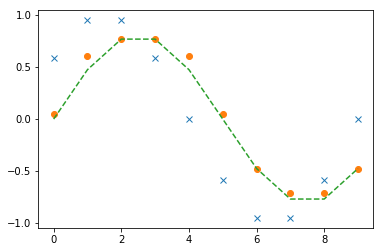

In [6]:
#MLP1
inputs = layers.Input(shape=(1,))
h = layers.Dense(10, activation='relu')(inputs)
outputs= layers.Dense(1, activation='tanh')(h)
model = models.Model(inputs, outputs)

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
model.fit(x_train, y_train, epochs=1000, batch_size=100, verbose=0)

# evaluate
y_pred = model.predict(x_test, batch_size=10, verbose=1)
plt.plot(y_test,'x')
plt.plot(y_pred,'o')
a = np.array([i for i in range(10)])
b = np.roll( np.flip(a,0),-4)
plt.plot(((y_test[a]+y_test[b])/2),'--')
plt.rcParams.update({'font.size': 20})

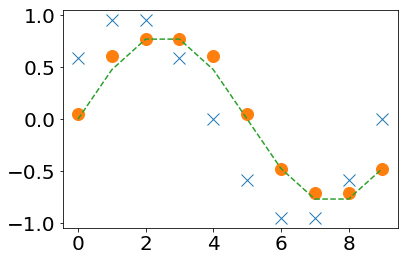

In [7]:
plt.rcParams.update({'font.size': 20})
plt.plot(y_test,'x',markersize=12)
plt.plot(y_pred,'o',markersize=12)
a = np.array([i for i in range(10)])
b = np.roll( np.flip(a,0),-4)
plt.plot(((y_test[a]+y_test[b])/2),'--')
plt.savefig('tmp.pdf', format='pdf')

In [8]:
x_train=np.array([])
y_train=np.array([])
for i in range(Num_sequences):
    ran=np.random.randint(10)
    x_train = np.append(x_train,[seq[ran],seq[np.mod(ran+1,10)]])
    y_train = np.append(y_train,seq[np.mod(ran+2,10)])
x_train=np.reshape(x_train,(Num_sequences,2))

x_test=np.array([seq,np.roll(seq,-1)]).T
y_test=np.array(np.roll(seq,-2))  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
10/10 [==============================] - 0s 20ms/step


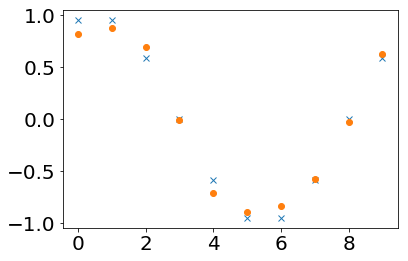

In [9]:
#MLP2
inputs = layers.Input(shape=(2,))
h = layers.Dense(2, activation='relu')(inputs)
outputs= layers.Dense(1, activation='tanh')(h)
model = models.Model(inputs, outputs)

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
model.fit(x_train, y_train, epochs=1000, batch_size=100, verbose=0)

# evaluate
y_pred = model.predict(x_test, batch_size=10, verbose=1)
plt.plot(y_test,'x')
plt.plot(y_pred,'o')
plt.savefig('tmp.pdf', format='pdf')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2, 1)              0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None
10/10 [==============================] - 0s 31ms/step


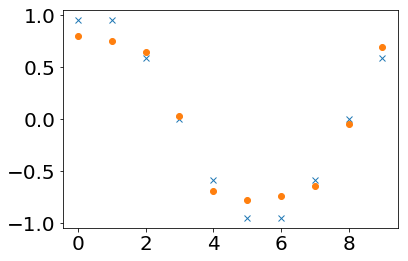

In [10]:
# RNN
x_train=np.reshape(x_train,(200,2,1))
x_test=np.reshape(x_test,(10,2,1))

inputs = layers.Input(batch_shape=(None,2,1))
x = layers.SimpleRNN(1, activation='tanh')(inputs)
outputs= layers.Dense(1, activation='tanh')(x)
model = models.Model(inputs, outputs)

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

model.fit(x_train, y_train, epochs=2000, batch_size=100, verbose=0)
# evaluate
y_pred = model.predict(x_test, batch_size=10, verbose=1)
plt.plot(y_test,'x')
plt.plot(y_pred,'o')

In [ ]:
plt.plot(y_test,'x',markersize=12)
plt.plot(y_pred,'o',markersize=12)
plt.savefig('tmp.pdf', format='pdf')